<a href="https://colab.research.google.com/github/ddiaz1999/Taller2_IA/blob/main/Analysis_%26_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>Boston Crime Prediction</strong>

*   **<font color='red'> Problema </font>** 
##### Predecir la ocurrencia de algún crimen con respecto a la fecha (mes y día) y lugar.


*   **<font color='red'> Dataset </font>** 
##### El *dataset* es tomado de [<font color='purple'><i>**Kaggle**<i></font>](https://www.kaggle.com/), estos datos son de dominio público. [<font color='blue'><i>**Ver dataset**<i></font>](https://www.kaggle.com/AnalyzeBoston/crimes-in-boston)
<br>

---
---

#####Desarrollado por: 
<h6 align=center> ${\text{Jhon Hader Fernández}}$ <h6>
<h6 align=center> ${\text{Diego Fernando Díaz}}$ <h6>
<h6 align=center> ${\text{Oscar Geovanny Baracaldo}}$ <h6>

#####<h6 align=center>{<i>jhon_fernandez, di-diego, obaracaldo</i>}@javeriana.edu.co<h6>
#####<h6 align=center>Pontificia Universidad Javeriana<h6>

<br>

## ***1. ENTORNO DE TRABAJO***

Para el desarrollo del sistema se requiere de algunos paquetes, módulos y librerías externas.

In [371]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import collections
import prettytable
import time
import os

from IPython.display import clear_output

In [372]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import folium 
from folium.plugins import HeatMap

## ***2. ANÁLISIS DE DATOS***

Inicialmente se debe hacer un análisis exploratorio de los datos, que darán información sobre el tipo de datos, la cantidad, los formatos de archivos, etc.

### ***2.1.  OBTENER DATASET*** 
* **<font color='green'><i> 2.1.1. </i></font>** <br>
 El **dataset**  es cargado desde una carpeta de **<font color='magenta'> Google drive </font>** por ello se debe obtener la ruta de la carpeta, para ello se solicitará un permiso de acceso a **<font color='magenta'> Google drive </font>**

* **<font color='green'><i> 2.1.2. </i></font>** <br>
Obtener la ruta de los archivos

* **<font color='green'><i> 2.1.3. </i></font>** <br>
Leer el archivo **<font color='red'> `crime.csv` </font>**

In [373]:
# 2.1.1
path = '/content/drive/My Drive/TALLER 2 IA/dataset'

# 2.1.2
files = []
for dirname, _, filenames in os.walk(path):
  for file in filenames:
    files.append(os.path.join(path,file))

path_files['crime'], path_files['ofense code'] = files[0], files[1]

# 2.1.3
data = pd.read_csv(path_files['crime'], encoding='latin')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### ***2.2.  ANÁLISIS PRELIMINAR DE DATOS*** 
Una vez de cargan los datos se procede a analizar su contenido, tal cual se observa en la tabla 2.

Se debe tener en cuenta, que aunque varias características tienen una representación numérica sus datos son categóricos, por ejemplo el ID es representado con un número pero representa un dato particular.

Es importante optener cuantas opciones tiene cada característica pues de antemano brinda información valiosa, como por ejemplo, se sabe que en total existe el registro de 67 grupos de crimenes, etc.

<br>
<h6 align=center><b> ${\text{Tabla 2. Features analysis}}$ </b><h6>

|${\text{Index}}$|${\text{Feature}}$|${\text{Type}}$|${\text{Options}}$|
|:--:|:------------------------:|:--------------------:|:--------------------:|
|${\text{1}}$|${\text{INCIDENT_NUMBER}}$|${\text{categorycal}}$|${\text{282517}}$
|${\text{2}}$|${\text{OFFESE_CODE}}$|${\text{categorycal}}$|${\text{222}}$
|${\text{3}}$|${\text{OFFENSE_CODE_GROUP}}$|${\text{categorycal}}$|${\text{67}}$
|${\text{4}}$|${\text{OFFENSE_DESCRIPTION}}$|${\text{categorycal}}$|${\text{244}}$
|${\text{5}}$|${\text{DISTRICT}}$|${\text{categorycal}}$|${\text{12}}$
|${\text{6}}$|${\text{REPORTING_AREA}}$|${\text{categorycal}}$|${\text{879}}$
|${\text{7}}$|${\text{SHOOTING}}$|${\text{categorycal}}$|${\text{1}}$
|${\text{8}}$|${\text{OCURRED_ON_DATE}}$|${\text{categorycal}}$|${\text{233229}}$
|${\text{9}}$|${\text{YEAR}}$|${\text{categorycal}}$|${\text{4}}$
|${\text{10}}$|${\text{MONTH}}$|${\text{categorycal}}$|${\text{12}}$
|${\text{11}}$|${\text{DAY_OF_WEEK}}$|${\text{categorycal}}$|${\text{7}}$
|${\text{12}}$|${\text{HOUR}}$|${\text{categorycal}}$|${\text{24}}$
|${\text{13}}$|${\text{UCR_PART}}$|${\text{categorycal}}$|${\text{4}}$
|${\text{14}}$|${\text{STREET}}$|${\text{categorycal}}$|${\text{4657}}$
|${\text{15}}$|${\text{Lat}}$|${\text{Numerical}}$|${\text{18178}}$
|${\text{16}}$|${\text{Long}}$|${\text{Numerical}}$|${\text{18178}}$
|${\text{17}}$|${\text{Location}}$|${\text{categorycal}}$|${\text{18194}}$

In [374]:
print('Shape of dataframe (samples, features):', data.shape, '\n')

columns = data.columns.tolist()
chart = PrettyTable(["Index", "Feature", "Options"])
for i, characteristic in enumerate(columns):
   options = data[characteristic].value_counts()
   options = list(options.keys())
   chart.add_row([i+1, characteristic, len(options)])

print('Feature and its options:')
print(chart,  '\n')

Shape of dataframe (samples, features): (319073, 17) 

Feature and its options:
+-------+---------------------+---------+
| Index |       Feature       | Options |
+-------+---------------------+---------+
|   1   |   INCIDENT_NUMBER   |  282517 |
|   2   |     OFFENSE_CODE    |   222   |
|   3   |  OFFENSE_CODE_GROUP |    67   |
|   4   | OFFENSE_DESCRIPTION |   244   |
|   5   |       DISTRICT      |    12   |
|   6   |    REPORTING_AREA   |   879   |
|   7   |       SHOOTING      |    1    |
|   8   |   OCCURRED_ON_DATE  |  233229 |
|   9   |         YEAR        |    4    |
|   10  |        MONTH        |    12   |
|   11  |     DAY_OF_WEEK     |    7    |
|   12  |         HOUR        |    24   |
|   13  |       UCR_PART      |    4    |
|   14  |        STREET       |   4657  |
|   15  |         Lat         |  18178  |
|   16  |         Long        |  18178  |
|   17  |       Location      |  18194  |
+-------+---------------------+---------+ 



### ***2.3.  ANÁLISIS DE DATOS PERDIDOS*** 

* **<font color='green'><i> 2.3.1. </i></font>** <br>
Se debe realizar un análisis datos perdidos, pues ayudarán a tener un criterio mas a la hora de seleccionar las características más relevantes.

* **<font color='green'><i> 2.3.2. </i></font>** <br>
Una vez se identifican los datos perdidos se elimina toda la muestra a la cual pertenece, por tanto, los datos disminuirán en muestras.

Shape of dataframe after delete missing data (samples, features): (971, 17) 



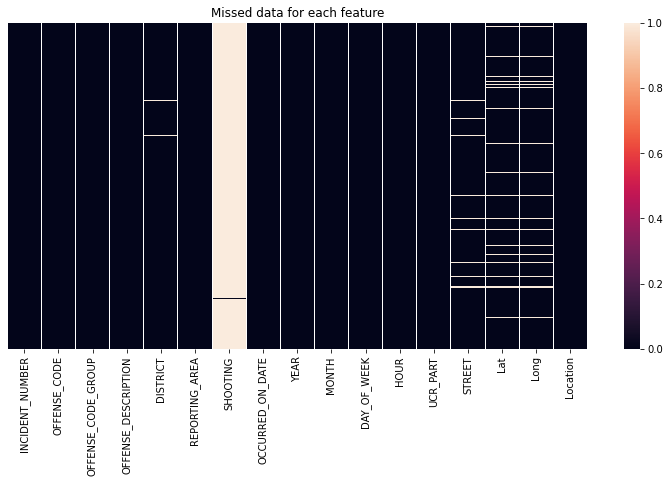

In [375]:
# 2.3.1
figure = plt.figure(figsize=(13,6))
sns.heatmap(data.isnull(),yticklabels='').set(title='Missed data for each feature');

# 2.3.2
data = data.dropna()
print('Shape of dataframe after delete missing data (samples, features):', data.shape, '\n')

### ***2.4.  DISTRIBUCIÓN DE CRIMENES POR FECHA*** 

* **<font color='green'><i> 2.4.1. </i></font>** <br>
Distribución de crimenes por año

* **<font color='green'><i> 2.4.2. </i></font>** <br>
Distribución de crimenes por mes

* **<font color='green'><i> 2.4.3. </i></font>** <br>
Distribución de crimenes por día de la semana

* **<font color='green'><i> 2.4.4. </i></font>** <br>
Distribución de crimenes por hora

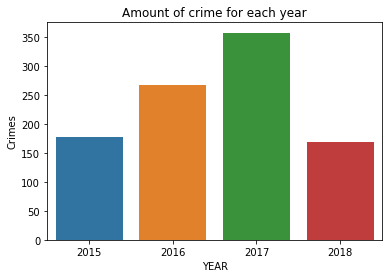

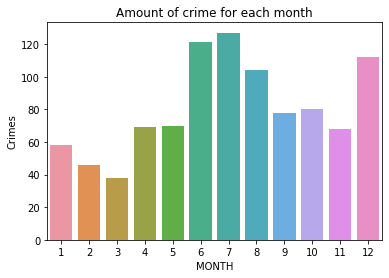

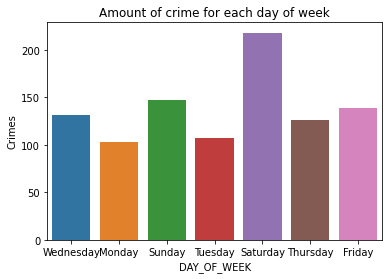

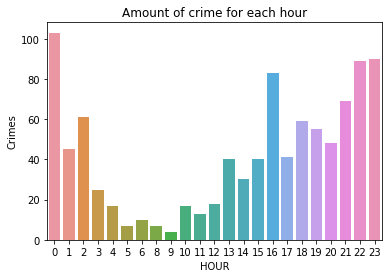

In [376]:
# 2.4.1
year = sns.countplot(data=data, x='YEAR').set(title='Amount of crime for each year', ylabel='Crimes');
plt.show()

# 2.4.2
month= sns.countplot(data=data, x='MONTH').set(title='Amount of crime for each month', ylabel='Crimes');
plt.show()

# 2.4.3
day_of_week = sns.countplot(data=data, x='DAY_OF_WEEK').set(title='Amount of crime for each day of week', ylabel='Crimes');
plt.show()

# 2.4.4
day = sns.countplot(data=data, x='HOUR').set(title='Amount of crime for each hour', ylabel='Crimes');
plt.show()

### ***2.5.  DISTRIBUCIÓN DE CRIMENES POR LUGAR*** 

* **<font color='green'><i> 2.5.1. </i></font>** <br>
Distribución de crimenes por calle

* **<font color='green'><i> 2.5.2. </i></font>** <br>
Distribución de crimenes por area de reporte

* **<font color='green'><i> 2.5.3. </i></font>** <br>
Distribución de crimenes por distrito

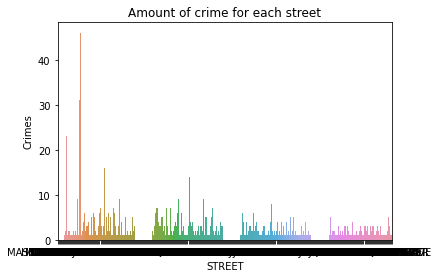

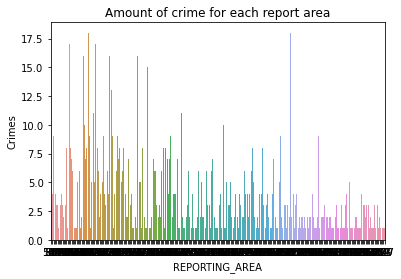

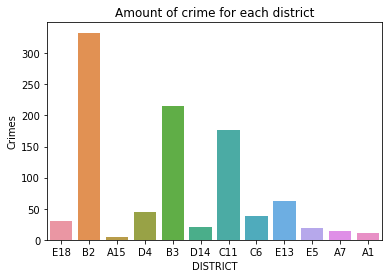

In [377]:
# 2.5.1
street = sns.countplot(data=data, x='STREET').set(title='Amount of crime for each street', ylabel='Crimes');
plt.show()

# 2.5.2
report_area = sns.countplot(data=data, x='REPORTING_AREA').set(title='Amount of crime for each report area', ylabel='Crimes');
plt.show()

# 2.5.3
district = sns.countplot(data=data, x='DISTRICT').set(title='Amount of crime for each district', ylabel='Crimes');
plt.show()

## ***3. PRE-PROCESAMIENTO DE DATOS***
Se debe ajustar y acondicionar los datos a los requerimientos del modelo.

### ***3.1.  RENOMBRAR Y ESCOGER CARACTERÍSTICAS*** 

* **<font color='green'><i> 3.1.1. </i></font>** <br>
Se realiza un renombramiento a las siguientes características:

<br>
<h6 align=center><b> ${\text{Tabla 1. Features rename}}$ </b><h6>

|    ${\text{Original name}}$    |    ${\text{Rename}}$   |
|:------------------------------:|:----------------------:|
|     ${\text{OFFENSE_CODE}}$    |     ${\text{Code}}$    |
| ${\text{OFFENSE_CODE_GROUP}}$  |     ${\text{Group}}$   |
| ${\text{OFFENSE_DESCRIPTION}}$ | ${\text{Description}}$ |
|   ${\text{OCURRED_ON_DATE}}$   |     ${\text{Date}}$    |


Los renombramientos se realizan para facilitar su recocimiento a la hora de codificar (realizar la programación).

<br>

* **<font color='green'><i> 3.1.2. </i></font>** <br>
Se eliminan las siguientes caracteristicas pues no se consideran relevantes:

  - INCIDENT_NUMBER
  - Code
  - SHOOTING
  - UCR_PART
  - Lat
  - Long
  - Location

Lo anterior se justifica de la siguiente manera: La problemática planteada es predecir un **<font color='orange'><i> crimen </i></font>** de acuerdo a una **<font color='red'><i> fecha </i></font>** y **<font color='red'><i> lugar </i></font>**, por ello la característica de interés a predecir es el crimen (**<font color='purple'><i> Group </i></font>**) las demás características ligadas a esta no son de interés (**número de incidente, código, parte de UCR**),
para obtener las fechas de toman todas las caracteristicas relacionadas a esta (**año, mes, día, hora, día de la semana**) y para obtener las características de lugar se toman todas las relacionadas a ella (**calle, area de reporte, distrito**) a excepción de la **longitud** y **latitud**, pues se considera que no se necesita ese nivel de precisión en la ubicación de un lugar.

In [378]:
# 3.1.1
data = data.rename(columns={'OFFENSE_CODE':'Code', 'OFFENSE_CODE_GROUP':'Group', 
                            'OFFENSE_DESCRIPTION':'Description','OCCURRED_ON_DATE':'Date'})

# 3.1.2
data.drop(['INCIDENT_NUMBER','Code','SHOOTING','UCR_PART','Lat','Long','Location'],inplace=True,axis=1)
print('New dataframe')
data.head()

New dataframe


,Group,Description,DISTRICT,REPORTING_AREA,Date,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
1295,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,2018-08-29 23:19:00,2018,8,Wednesday,23,HILLIS RD
1860,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,2018-08-27 22:56:00,2018,8,Monday,22,DUDLEY ST
3259,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,2018-08-22 15:00:00,2018,8,Wednesday,15,HOLLANDER ST
3260,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,2018-08-22 15:00:00,2018,8,Wednesday,15,HOLLANDER ST
4107,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,2018-08-19 22:46:00,2018,8,Sunday,22,MCNULTY CT


### ***3.2.  OBTENER SERIES DE TIEMPOS*** 
Se obtiene la serie de tiempo, para ello, se compacta la fecha (año/mes/día:hora) en el formato **<font color='green'> `datetime` </font>**.
Es decir, la caracteristica **<font color='red'> 'Date' </font>** tiene que ser del formato ya mencionado.

In [379]:
data['Date']=pd.to_datetime(data['Date'])
data.index = pd.DatetimeIndex(data.Date)
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2018-08-29 23:19:00 to 2015-06-16 20:41:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Group           971 non-null    object        
 1   Description     971 non-null    object        
 2   DISTRICT        971 non-null    object        
 3   REPORTING_AREA  971 non-null    object        
 4   Date            971 non-null    datetime64[ns]
 5   YEAR            971 non-null    int64         
 6   MONTH           971 non-null    int64         
 7   DAY_OF_WEEK     971 non-null    object        
 8   HOUR            971 non-null    int64         
 9   STREET          971 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 83.4+ KB


### ***3.3.  SELECCIONAR CRIMENES*** 
Como se observa en la **Tabla 2** hay 67 grupos (tipos) de crimenes, pero no todos tienen la misma frecuencia de ocurrencia, por ello, se establece un hiper-parámetro que selecciona el número de crimenes a considerar, donde se jerarquiza la relevancia de un crimen de acuerdo a su ocurrencia.

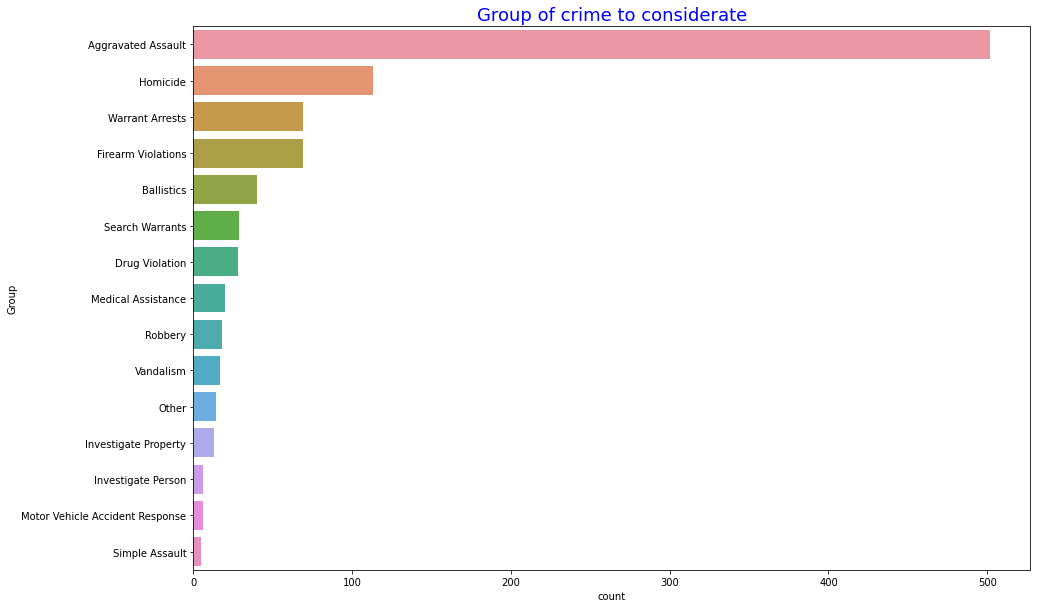

In [380]:
number_of_crimes_to_considerate = 15

order_data = data['Group'].value_counts().iloc[:number_of_crimes_to_considerate].index
plt.figure(figsize=(15,10))
plt.title('Group of crime to considerate', fontsize=18, color='blue') 
sns.countplot(y='Group', data=data, order=order_data)
plt.ioff()

### ***3.4.  CODIFICACIÓN DE CRIMENES*** 

* **<font color='green'><i> 3.4.1. </i></font>** <br>
Se seleccionan los datos que contengan el en ellos el alguno de los grupos de crimenes seleccionados previamente

* **<font color='green'><i> 3.4.2. </i></font>** <br>
De acuerdo a los crimenes seleccionados previamente, a estos se les aplica una codificación **<font color='green'> `OneHot` </font>**

In [381]:
# 3.4.1
crimes = data['Group'].value_counts().iloc[:number_of_crimes_to_considerate]
crimes = list(crimes.keys())
data = data.loc[data['Group'].isin(crimes)]

# 3.4.2
data['Group'] = data['Group'].astype('category')
data = pd.get_dummies(data=data['Group'])

print('There are', len(list(data.columns)), ' crime features: ')
print(list(data.columns), '\n')
print('Shape of dataframe (samples, features):', data.shape, '\n')

data.head()

There are 15  crime features: 
['Aggravated Assault', 'Ballistics', 'Drug Violation', 'Firearm Violations', 'Homicide', 'Investigate Person', 'Investigate Property', 'Medical Assistance', 'Motor Vehicle Accident Response', 'Other', 'Robbery', 'Search Warrants', 'Simple Assault', 'Vandalism', 'Warrant Arrests'] 

Shape of dataframe (samples, features): (949, 15) 



,Aggravated Assault,Ballistics,Drug Violation,Firearm Violations,Homicide,Investigate Person,Investigate Property,Medical Assistance,Motor Vehicle Accident Response,Other,Robbery,Search Warrants,Simple Assault,Vandalism,Warrant Arrests
Date,,,,,,,,,,,,,,,
2018-08-29 23:19:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-27 22:56:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-22 15:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2018-08-22 15:00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-19 22:46:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ***3.5.  AGRUPAR GRUPOS DE CRIMENES POR FECHAS*** 
Una vez se tienen los datos se agrupan por fecha de acuerdo a una periodicidad (hora, día, mes, año), por ejemplo: Si se tiene que un crimen ocurrió dos veces en el mismo mes estos se pueden agrupar. Para ello existe un hiper-parámetro que controla la periodicidad de agrupación.

In [382]:
perodicity = 'M'

data = data.resample(perodicity).sum()
print('Shape of dataframe (samples, features):', data.shape, '\n')
data.head()

Shape of dataframe (samples, features): (39, 15) 



,Aggravated Assault,Ballistics,Drug Violation,Firearm Violations,Homicide,Investigate Person,Investigate Property,Medical Assistance,Motor Vehicle Accident Response,Other,Robbery,Search Warrants,Simple Assault,Vandalism,Warrant Arrests
Date,,,,,,,,,,,,,,,
2015-06-30,7,0,0,2,0,0,0,0,0,1,0,0,0,1,1
2015-07-31,27,0,0,1,4,0,0,2,0,0,1,3,0,0,0
2015-08-31,21,2,1,1,3,0,1,2,0,0,0,0,1,0,3
2015-09-30,9,1,1,1,4,0,0,0,0,1,0,2,0,1,1
2015-10-31,7,1,0,1,2,0,0,0,0,0,0,2,0,0,2


### ***3.6.  OBTENER CONJUNTO DE ENTRENAMIENTO Y PRUEBAS*** 

Como la predicción es de un crimen en función de una fecha, la única característica es la fecha y el resultado (etiquetas) es el grupo de crimen. Por ello, se decide separar el conjunto de datos en uno de entrenamiento y otro de pruebas, si bien es cierto que es un problema de predicción (regresión) se debe tener unos datos para observar el desempeño del modelo. Para ello existe un hiper-parámetro que controla el porcentaje de partición.

* **<font color='green'><i> 3.6.1. </i></font>** <br>
Obtener las características

* **<font color='green'><i> 3.6.1. </i></font>** <br>
Obtener las resultados



In [383]:
percentage_of_train_data = 0.85

len_train = int(data.shape[0] * percentage_of_train_data)

# 3.6.1
X = np.array(data.index)
X = X[:,np.newaxis]
X_train = X[0:len_train]
X_test = X[len_train:len(X)]

# 3.6.2
Y_train = []
y_test = []

for crime in crimes:
  y = data[crime]
  Y_train.append(y[0:len_train])
  y_test.append(y[len_train:len(y)])

Y_train = np.array(Y_train)
y_test = np.array(y_test)

print('Dataset set amount')
chart = PrettyTable(["Data", "Shape (samples, features)", 'Percentage (%)'], )
chart.add_row(['Train', X_train.shape, percentage_of_train_data*100])
chart.add_row(['Test', X_test.shape, 100-percentage_of_train_data*100])
chart.add_row(['------------', '-------------------------','---------------'])
chart.add_row(['Total', X.shape, 100])
print(chart,  '\n')

Dataset set amount
+--------------+---------------------------+-----------------+
|     Data     | Shape (samples, features) |  Percentage (%) |
+--------------+---------------------------+-----------------+
|    Train     |          (33, 1)          |       85.0      |
|     Test     |           (6, 1)          |       15.0      |
| ------------ | ------------------------- | --------------- |
|    Total     |          (39, 1)          |       100       |
+--------------+---------------------------+-----------------+ 



## ***4. MODELO***
Se utiliza el modelo de máquina de soporte vectorial (SVM) en modo de regresión (predicción).



### ***4.1.  ENTRENAMIENTO*** 

El planteamiento de la solución consiste en realizar ***n*** predictores, donde ***n*** es la cantidad de grupos de crimenes seleccionados, es decir, se realiza un predictor para cada grupo de crimen, esto nos dará la cantidad de crimenes (para cada grupo de crimenes) que ocurrirán para una cierta fecha.

* **<font color='green'><i> 4.1.1. </i></font>** <br>
Estandarizar los datos a un rango entre **`[0, 1]`**

* **<font color='green'><i> 4.2.1. </i></font>** <br>
Entrenar cada predictor para su correspondiente grupo de crimen

In [384]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

def train(X_train, Y_train):
  regr = {}
  for idx, crime in enumerate(Y_train):
    # 4.1.1
    regr[crimes[idx]] = make_pipeline(MinMaxScaler(), SVR())
    # 4.1.2
    regr[crimes[idx]].fit(X_train, crime)
  return regr

# Predictor for each group of crime
predictors = train(X_train, Y_train)

### ***4.2.  EVALUCIÓN DE MODELO*** 

Como se realizó una regresión la metrica de desempeño escogida es $R^{2}$.
El proceso que se realizó, es hallar esta metrica para cada predictor y posteriormente realizar un promedio sobre las mismas.

In [385]:
def evaluate_model(estimators, X_test, y_test):
  scores = []
  for idx in range(len(estimators)):
    scores.append(estimators[crimes[idx]].score(X_test, y_test[idx]))
  global_score = sum(scores)/len(scores)
  print('Score [R\u00b2] is: ', global_score)

evaluate_model(predictors, X_test, y_test)

Score [R²] is:  -0.5915169983683444


### ***4.3.  PREDICCIÓN*** 

A continuación se realiza una predicción para ciertas fechas.

In [386]:
def predict_crime(estimators, X_test, y_test):
  Y_predict = []
  for idx, predictors in enumerate(estimators):
    Y_predict.append(estimators[crimes[idx]].predict(X_test))
  Y_predict = np.array(Y_predict).T

  predict_df = show_predict(X_test, Y_predict)
  return predict_df

def show_predict(X, Y):
  predict_frame = collections.defaultdict(list)
  for i in range(len(X)):
    predict_frame['Date'].append(X[i][0])
    for j, crime in enumerate(crimes):
      predict_frame[crime].append(round(Y[i][j], 2))
  predict_frame = pd.DataFrame(predict_frame)
  predict_frame['Date'] = pd.to_datetime(predict_frame['Date'])
  predict_frame.index = pd.DatetimeIndex(predict_frame.Date)
  predict_frame.drop(['Date'], inplace=True, axis=1)
  return predict_frame


print('Crimes predicted to date:')
m = predict_crime(predictors, X_test, y_test)
m.head()

Crimes predicted to date:


,Aggravated Assault,Homicide,Warrant Arrests,Firearm Violations,Ballistics,Search Warrants,Drug Violation,Medical Assistance,Robbery,Vandalism,Other,Investigate Property,Investigate Person,Motor Vehicle Accident Response,Simple Assault
Date,,,,,,,,,,,,,,,
2018-03-31,11.51,3.01,1.92,1.91,0.95,1.41,0.37,0.09,0.08,0.11,0.70,0.1,0.10,0.06,0.10
2018-04-30,11.34,2.93,1.92,1.92,0.85,1.41,0.32,0.08,-0.01,0.11,0.71,0.1,0.09,0.04,0.10
2018-05-31,11.20,2.87,1.91,1.91,0.76,1.37,0.28,0.06,-0.09,0.12,0.70,0.1,0.09,0.03,0.10
2018-06-30,11.10,2.84,1.90,1.89,0.68,1.32,0.25,0.06,-0.14,0.12,0.68,0.1,0.09,0.01,0.09
2018-07-31,11.03,2.81,1.87,1.87,0.60,1.25,0.24,0.05,-0.17,0.12,0.65,0.1,0.08,0.00,0.09


### ***4.4.  RESULTADOS REALES DE LA PREDICCIÓN PREVIA***

A continuación se muestran los resultados reales para la predicción realizada previamente.

In [387]:
print('Real crime result:')
n = show_predict(X_test, y_test.T)
n.head()

Real crime result:


,Aggravated Assault,Homicide,Warrant Arrests,Firearm Violations,Ballistics,Search Warrants,Drug Violation,Medical Assistance,Robbery,Vandalism,Other,Investigate Property,Investigate Person,Motor Vehicle Accident Response,Simple Assault
Date,,,,,,,,,,,,,,,
2018-03-31,4,1,1,0,1,0,0,0,1,0,0,0,0,0,0
2018-04-30,7,3,2,3,1,1,0,1,0,1,0,0,0,0,0
2018-05-31,11,2,3,5,2,0,0,1,1,2,0,0,0,0,0
2018-06-30,13,3,2,7,1,3,0,1,0,1,2,1,0,0,0
2018-07-31,12,5,3,1,1,0,2,1,0,0,0,0,1,0,0


## ***5. RESULTADOS Y CONCLUSIONES***
Al observar el valor del $R^{2}$ es negativo, lo cual indica que el modelo seleccionado no se ajusta a la función que describe estos datos, por ello es recomendable buscar otra alternativa de modelo o complementar con algún tipo de predicción (clasificación). Esto último fue lo que se optó hacer.
Adicionalmente, al ver el pobre desempeño del predictor de crimenes para las fechas se optó por realizar el predictor de crimenes para lugares, y volcar toda la energía y tiempo en realizar una clasificación.

Lo anterior se puede observar en el siguiente notebook [<font color='purple'><i>**Classification**<i></font>](https://github.com/ddiaz1999/Taller2_IA)
